In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df_high = pd.read_csv('high.csv')
df_low = pd.read_csv('low.csv')

In [3]:
df_high[df_high.MARKET == 0]

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
11,01/02/2022,111027,BAMB,0,3386.00,12540,11,0.28,1.23,12135.0,1.73,2192.0
33,01/02/2022,131064,ABLA,0,81.80,1020,2,0.09,1.02,369800.0,1.52,48431.0
42,01/02/2022,131092,ARED,0,303.80,10120,2,0.04,1.02,231319.0,1.52,675416.0
45,01/02/2022,131213,RJAL,0,149.50,650,2,0.23,1.02,350.0,1.52,43500.0
46,01/02/2022,131217,IPRO,0,12694.00,126928,57,0.11,2.29,10.0,2.77,631070.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27993,31/10/2022,141059,JNCC,0,20.00,500,2,0.04,1.02,49966.0,1.52,1400.0
27996,31/10/2022,141072,AEIN,0,1539.50,16000,8,0.10,1.16,32850.0,1.66,6050.0
27998,31/10/2022,141086,INOH,0,9383.58,8481,45,1.15,2.01,733.0,2.50,500.0
28000,31/10/2022,141097,MECE,0,3642.33,8671,16,0.43,1.34,1156.0,1.84,34300.0


In [3]:
df_high

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28007,31/10/2022,141214,ASAS,2,1025509.50,1981726,25,0.52,1.55,2462.0,2.04,0.0
28008,31/10/2022,141215,UCIC,2,154.70,455,2,0.34,1.02,6959.0,1.52,14710.0
28009,31/10/2022,141223,SHBA,2,57426.99,10276,14,5.61,1.29,70.0,1.79,0.0
28010,31/10/2022,141224,NCCO,1,1135.00,500,1,2.27,1.00,500.0,1.50,500.0


In [4]:
df_low

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.65,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.41,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.00,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.95,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.95,1.23,1000.0,1.73,333.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28007,31/10/2022,141214,ASAS,2,1025509.50,1981726,25,0.51,1.55,2462.0,2.04,0.0
28008,31/10/2022,141215,UCIC,2,154.70,455,2,0.34,1.02,6959.0,1.52,14710.0
28009,31/10/2022,141223,SHBA,2,57426.99,10276,14,5.35,1.29,70.0,1.79,0.0
28010,31/10/2022,141224,NCCO,1,1135.00,500,1,2.27,1.00,500.0,1.50,500.0


In [5]:
df_high.isnull().sum()

TRADE_DATE        0
SEC_CODE          0
SYMBOL1           0
MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
HIGH              0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
dtype: int64

In [6]:
df_high['YEAR'] = pd.DatetimeIndex(df_high['TRADE_DATE']).year
df_high['MONTH']= pd.DatetimeIndex(df_high['TRADE_DATE']).month
df_high['DAY']= pd.DatetimeIndex(df_high['TRADE_DATE']).day
df_high.drop('TRADE_DATE', axis=1, inplace=True)

In [7]:
df_low['YEAR'] = pd.DatetimeIndex(df_low['TRADE_DATE']).year
df_low['MONTH']= pd.DatetimeIndex(df_low['TRADE_DATE']).month
df_low['DAY']= pd.DatetimeIndex(df_low['TRADE_DATE']).day
df_low.drop('TRADE_DATE', axis=1, inplace=True)

# Descriptive Analysis

In [8]:
df_high

,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY,YEAR,MONTH,DAY
0,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0,2022,1,2
1,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0,2022,1,2
2,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0,2022,1,2
3,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0,2022,1,2
4,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0,2022,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28007,141214,ASAS,2,1025509.50,1981726,25,0.52,1.55,2462.0,2.04,0.0,2022,10,31
28008,141215,UCIC,2,154.70,455,2,0.34,1.02,6959.0,1.52,14710.0,2022,10,31
28009,141223,SHBA,2,57426.99,10276,14,5.61,1.29,70.0,1.79,0.0,2022,10,31
28010,141224,NCCO,1,1135.00,500,1,2.27,1.00,500.0,1.50,500.0,2022,10,31


In [9]:
df_low

,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY,YEAR,MONTH,DAY
0,111001,JOIB,1,199083.73,54378,73,3.65,2.65,585.0,3.13,2000.0,2022,1,2
1,111002,JOKB,1,12707.76,9009,17,1.41,1.36,493.0,1.86,1570.0,2022,1,2
2,111003,JCBK,2,727.41,726,7,1.00,1.14,1853.0,1.64,1000.0,2022,1,2
3,111004,THBK,1,1558.10,394,5,3.95,1.09,660.0,1.59,46.0,2022,1,2
4,111006,SIBK,1,29030.98,14867,11,1.95,1.23,1000.0,1.73,333.0,2022,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28007,141214,ASAS,2,1025509.50,1981726,25,0.51,1.55,2462.0,2.04,0.0,2022,10,31
28008,141215,UCIC,2,154.70,455,2,0.34,1.02,6959.0,1.52,14710.0,2022,10,31
28009,141223,SHBA,2,57426.99,10276,14,5.35,1.29,70.0,1.79,0.0,2022,10,31
28010,141224,NCCO,1,1135.00,500,1,2.27,1.00,500.0,1.50,500.0,2022,10,31


In [10]:
df_high.describe()

,SEC_CODE,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY,YEAR,MONTH,DAY
count,28012.000000,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04,28012.0,28012.000000,28012.000000
mean,131287.967871,1.385906,6.312677e+04,4.270346e+04,28.061545,1.713816,1.620775,1.979999e+04,2.113421,2.452341e+04,2022.0,6.517028,15.880087
std,9043.995400,0.750480,3.022558e+05,1.451785e+05,66.231007,4.667872,1.520599,6.742718e+04,1.500857,1.008184e+05,0.0,3.369623,8.743568
min,111001.000000,0.000000,2.000000e-02,1.000000e+00,1.000000,0.020000,1.000000,0.000000e+00,1.500000,0.000000e+00,2022.0,1.000000,1.000000
25%,131052.000000,1.000000,6.398300e+02,1.000000e+03,3.000000,0.380000,1.050000,5.000000e+02,1.550000,4.000000e+02,2022.0,4.000000,9.000000
50%,131243.000000,2.000000,3.831125e+03,5.873500e+03,9.000000,0.710000,1.180000,2.100000e+03,1.680000,1.912000e+03,2022.0,7.000000,16.000000
75%,141014.000000,2.000000,2.014495e+04,2.843675e+04,25.000000,1.460000,1.550000,9.494250e+03,2.040000,1.038675e+04,2022.0,9.000000,23.000000
max,142041.000000,2.000000,8.868824e+06,5.741963e+06,1700.000000,44.500000,40.000000,1.017951e+06,40.000000,3.600734e+06,2022.0,12.000000,31.000000


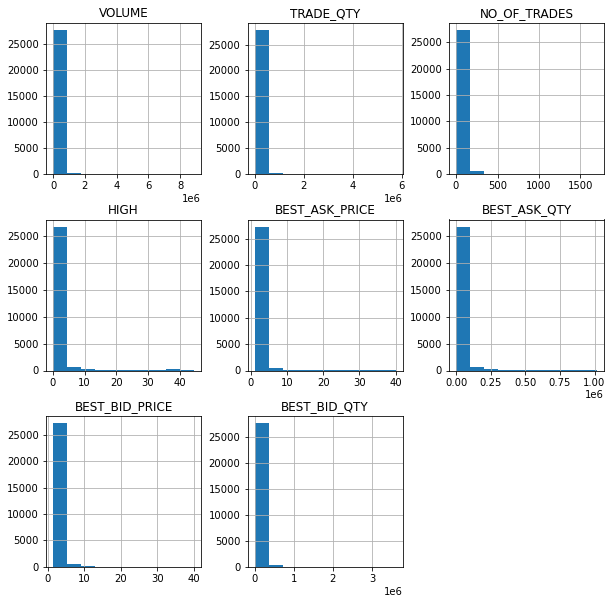

In [11]:
df_high[['VOLUME',
       'TRADE_QTY', 'NO_OF_TRADES', 'HIGH',
       'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 
       'BEST_BID_QTY']].hist(figsize=(10,10));

### MARKET

cumultative frequencey

In [12]:
pd.get_dummies(df_high.MARKET).cumsum()

,0,1,2
0,0,1,0
1,0,2,0
2,0,2,1
3,0,3,1
4,0,4,1
...,...,...,...
28007,4569,8062,15377
28008,4569,8062,15378
28009,4569,8062,15379
28010,4569,8063,15379


cumultative relative frequencey

In [13]:
pd.get_dummies(df_high.MARKET).cumsum().div(pd.Series(df_high.index.values)+1,axis=0)

,0,1,2
0,0.000000,1.000000,0.000000
1,0.000000,1.000000,0.000000
2,0.000000,0.666667,0.333333
3,0.000000,0.750000,0.250000
4,0.000000,0.800000,0.200000
...,...,...,...
28007,0.163132,0.287846,0.549022
28008,0.163126,0.287836,0.549038
28009,0.163120,0.287826,0.549054
28010,0.163114,0.287851,0.549034


mode

In [14]:
df_high.MARKET.mode()

0    2
dtype: int64

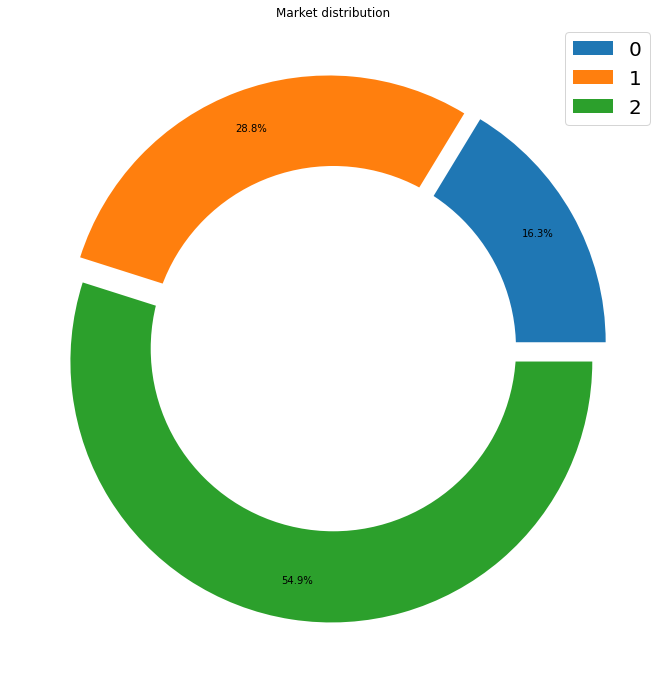

In [15]:
plt.figure(figsize=(12,12))
plt.pie(df_high.MARKET.value_counts().sort_index(),
        autopct='%1.1f%%', pctdistance=0.85, explode=[0.05 for i in range(len(df_high.MARKET.value_counts()))])
plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.title('Market distribution')
plt.legend(list(df_high.MARKET.value_counts().sort_index().index), loc="upper right", fontsize=20)
plt.show()

### NO_OF_TRADES

Statistical summary

In [16]:
df_high.NO_OF_TRADES.describe()

count    28012.000000
mean        28.061545
std         66.231007
min          1.000000
25%          3.000000
50%          9.000000
75%         25.000000
max       1700.000000
Name: NO_OF_TRADES, dtype: float64

IQR

In [17]:
import scipy
scipy.stats.iqr(df_high.NO_OF_TRADES)

22.0

In [18]:
from scipy.stats import zscore
zscore(df_high.NO_OF_TRADES)

0        0.678523
1       -0.167018
2       -0.318007
3       -0.348205
4       -0.257611
           ...   
28007   -0.046226
28008   -0.393502
28009   -0.212314
28010   -0.408601
28011    8.152497
Name: NO_OF_TRADES, Length: 28012, dtype: float64

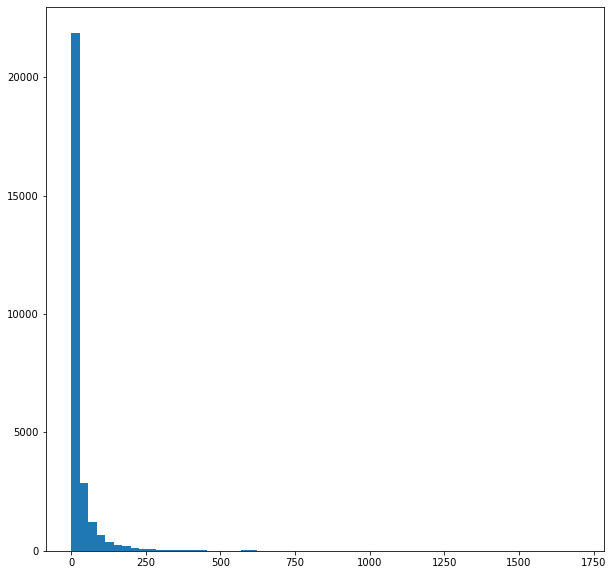

In [19]:
plt.figure(figsize=(10,10))
plt.hist(df_high.NO_OF_TRADES, bins=60)
plt.show()

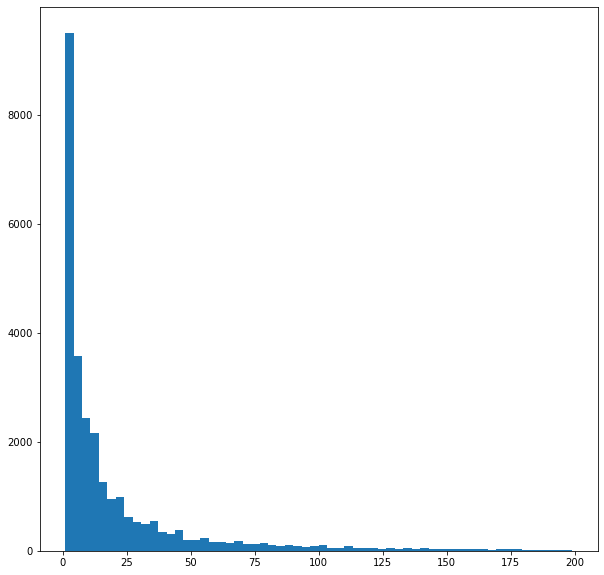

In [20]:
plt.figure(figsize=(10,10))
plt.hist(df_high.NO_OF_TRADES[df_high.NO_OF_TRADES<200], bins=60)
plt.show()

<AxesSubplot:xlabel='NO_OF_TRADES'>

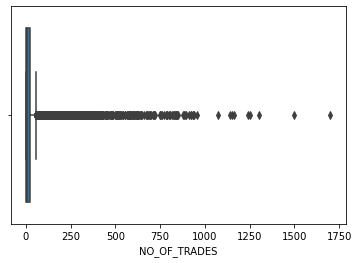

In [21]:
sns.boxplot(data=df_high, x='NO_OF_TRADES')

<AxesSubplot:xlabel='NO_OF_TRADES'>

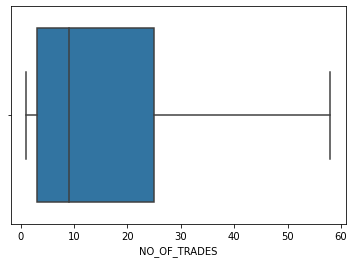

In [22]:
sns.boxplot(data=df_high, x='NO_OF_TRADES', showfliers = False)

### VOLUME

Statistical summary

In [23]:
df_high.VOLUME.describe()

count    2.801200e+04
mean     6.312677e+04
std      3.022558e+05
min      2.000000e-02
25%      6.398300e+02
50%      3.831125e+03
75%      2.014495e+04
max      8.868824e+06
Name: VOLUME, dtype: float64

IQR

In [24]:
import scipy
scipy.stats.iqr(df_high.VOLUME)

19505.1175

In [25]:
from scipy.stats import zscore
zscore(df_high.VOLUME)

0        0.449816
1       -0.166812
2       -0.206449
3       -0.203701
4       -0.112806
           ...   
28007    3.184058
28008   -0.208344
28009   -0.018858
28010   -0.205101
28011    2.838312
Name: VOLUME, Length: 28012, dtype: float64

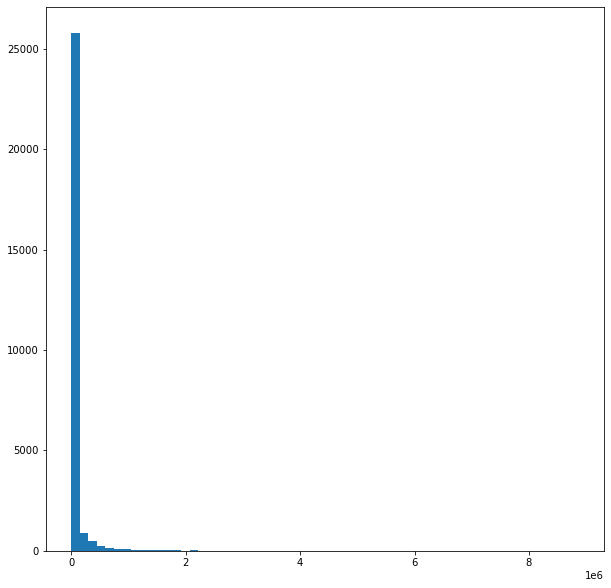

In [26]:
plt.figure(figsize=(10,10))
plt.hist(df_high.VOLUME, bins=60)
plt.show()

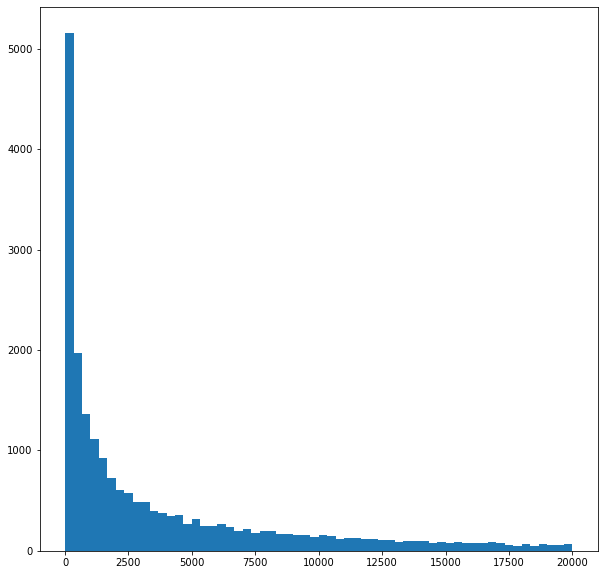

In [27]:
plt.figure(figsize=(10,10))
plt.hist(df_high.VOLUME[df_high.VOLUME<20000], bins=60)
plt.show()

<AxesSubplot:xlabel='VOLUME'>

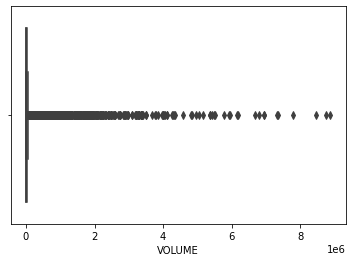

In [28]:
sns.boxplot(data=df_high, x='VOLUME')

<AxesSubplot:xlabel='VOLUME'>

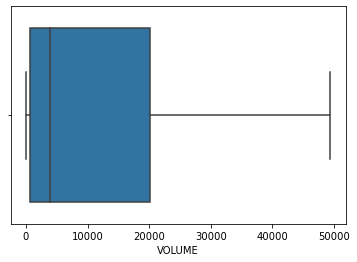

In [29]:
sns.boxplot(data=df_high, x='VOLUME', showfliers = False)

In [30]:
df_high[['VOLUME',
       'TRADE_QTY', 'NO_OF_TRADES', 'HIGH',
       'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 
       'BEST_BID_QTY']].corr()

,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
VOLUME,1.000000,0.620277,0.777427,0.310333,0.777378,-0.026209,0.777434,-0.011380
TRADE_QTY,0.620277,1.000000,0.449219,-0.013221,0.449198,0.080231,0.449170,0.075985
NO_OF_TRADES,0.777427,0.449219,1.000000,0.288890,0.999997,-0.020228,0.999998,0.001323
HIGH,0.310333,-0.013221,0.288890,1.000000,0.289028,-0.086154,0.289048,-0.070636
BEST_ASK_PRICE,0.777378,0.449198,0.999997,0.289028,1.000000,-0.020253,0.999999,0.001313
BEST_ASK_QTY,-0.026209,0.080231,-0.020228,-0.086154,-0.020253,1.000000,-0.020260,0.271098
BEST_BID_PRICE,0.777434,0.449170,0.999998,0.289048,0.999999,-0.020260,1.000000,0.001308
BEST_BID_QTY,-0.011380,0.075985,0.001323,-0.070636,0.001313,0.271098,0.001308,1.000000


In [31]:
pd.crosstab(df_high.MONTH, df_high.MARKET, margins=True)

MARKET,0,1,2,All
MONTH,,,,
1,330,588,1247,2165
2,354,598,1270,2222
3,423,672,1389,2484
4,317,605,1117,2039
5,395,657,1137,2189
6,469,777,1506,2752
7,399,755,1436,2590
8,394,763,1357,2514
9,393,693,1303,2389


In [32]:
df_high[['VOLUME',
       'TRADE_QTY', 'NO_OF_TRADES', 'HIGH',
       'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 
       'BEST_BID_QTY']].corr()

,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
VOLUME,1.000000,0.620277,0.777427,0.310333,0.777378,-0.026209,0.777434,-0.011380
TRADE_QTY,0.620277,1.000000,0.449219,-0.013221,0.449198,0.080231,0.449170,0.075985
NO_OF_TRADES,0.777427,0.449219,1.000000,0.288890,0.999997,-0.020228,0.999998,0.001323
HIGH,0.310333,-0.013221,0.288890,1.000000,0.289028,-0.086154,0.289048,-0.070636
BEST_ASK_PRICE,0.777378,0.449198,0.999997,0.289028,1.000000,-0.020253,0.999999,0.001313
BEST_ASK_QTY,-0.026209,0.080231,-0.020228,-0.086154,-0.020253,1.000000,-0.020260,0.271098
BEST_BID_PRICE,0.777434,0.449170,0.999998,0.289048,0.999999,-0.020260,1.000000,0.001308
BEST_BID_QTY,-0.011380,0.075985,0.001323,-0.070636,0.001313,0.271098,0.001308,1.000000


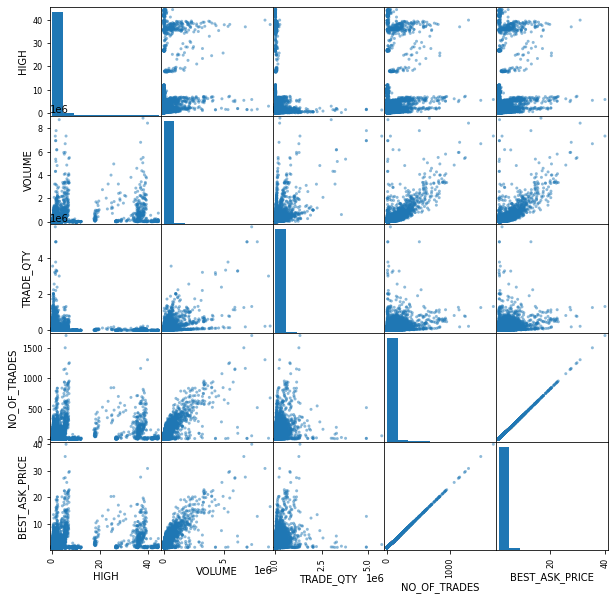

In [33]:
pd.plotting.scatter_matrix(df_high[['HIGH','VOLUME',
       'TRADE_QTY', 'NO_OF_TRADES','BEST_ASK_PRICE']], figsize=(10,10));

In [34]:
df_high.isna().sum()

SEC_CODE          0
SYMBOL1           0
MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
HIGH              0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
YEAR              0
MONTH             0
DAY               0
dtype: int64

# HIGH LABEL

In [35]:
X = df_high.drop(['HIGH'], axis=1)
y = df_high.HIGH

In [36]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

preprocessing = make_column_transformer(
    ('drop', ['SYMBOL1']),
    (OneHotEncoder(), ['MARKET']),
    remainder='passthrough')



# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
ml_LR = LinearRegression()

In [39]:
SFS = SequentialFeatureSelector(ml_LR, n_features_to_select='auto', scoring='r2')
params_SFS={
    'featureSelector':[SFS]
}


SKB = SelectKBest(f_regression, k=13)
params_SKB={
    'featureSelector':[SKB] 
}


VT = VarianceThreshold(threshold=0.005)
params_VT = {
    'featureSelector':[VT],
}

params=[params_SFS,params_SKB,params_VT]

In [40]:
preprocessing.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop', ['SYMBOL1']),
                                ('onehotencoder', OneHotEncoder(), ['MARKET'])])

In [41]:
preprocessing.get_feature_names_out()[SFS.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__VOLUME', 'remainder__TRADE_QTY', 'remainder__DAY'],
      dtype=object)

In [42]:
preprocessing.get_feature_names_out()[SKB.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__VOLUME', 'remainder__TRADE_QTY',
       'remainder__NO_OF_TRADES', 'remainder__BEST_ASK_PRICE',
       'remainder__BEST_ASK_QTY', 'remainder__BEST_BID_PRICE',
       'remainder__BEST_BID_QTY', 'remainder__MONTH', 'remainder__DAY'],
      dtype=object)

In [43]:
preprocessing.get_feature_names_out()[VT.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__MONTH', 'remainder__DAY'], dtype=object)

In [44]:
pipe_LR = Pipeline([('preprocessing',preprocessing), ('scaling', MinMaxScaler()), ('featureSelector',params),('regressor',ml_LR)])

In [45]:
pipe_LR.named_steps

{'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('drop', 'drop', ['SYMBOL1']),
                                 ('onehotencoder', OneHotEncoder(), ['MARKET'])]),
 'scaling': MinMaxScaler(),
 'featureSelector': [{'featureSelector': [SequentialFeatureSelector(estimator=LinearRegression(),
                              n_features_to_select='auto', scoring='r2')]},
  {'featureSelector': [SelectKBest(k=13, score_func=<function f_regression at 0x0000021638C3CA60>)]},
  {'featureSelector': [VarianceThreshold(threshold=0.005)]}],
 'regressor': LinearRegression()}

In [46]:
grid_LR = GridSearchCV(pipe_LR, params, cv=10, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], refit='r2', n_jobs=-1)

In [47]:
grid_LR.fit(X,y);

In [48]:
LR_df = pd.DataFrame(grid_LR.cv_results_)
LR_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_featureSelector,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,...,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,split5_test_neg_root_mean_squared_error,split6_test_neg_root_mean_squared_error,split7_test_neg_root_mean_squared_error,split8_test_neg_root_mean_squared_error,split9_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,4.686637,0.066369,0.006915,0.002629,SequentialFeatureSelector(estimator=LinearRegr...,{'featureSelector': SequentialFeatureSelector(...,0.289473,0.300310,0.272437,0.285092,...,-4.007513,-3.955176,-3.921521,-4.017136,-3.953202,-4.028925,-4.113426,-3.933598,0.130129,2
1,0.116682,0.014885,0.013958,0.003101,"SelectKBest(k=13, score_func=<function f_regre...","{'featureSelector': SelectKBest(k=13, score_fu...",0.294873,0.305085,0.276087,0.290280,...,-3.992945,-3.946082,-3.905978,-3.999969,-3.945744,-4.028513,-4.099097,-3.922073,0.130716,1
2,0.073710,0.007176,0.012309,0.001083,VarianceThreshold(threshold=0.005),{'featureSelector': VarianceThreshold(threshol...,0.201459,0.198035,0.200677,0.197689,...,-4.245425,-4.187850,-4.180503,-4.230733,-4.231165,-4.312230,-4.381973,-4.178551,0.146880,3


In [49]:
LR_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']]

,param_featureSelector,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error
0,SequentialFeatureSelector(estimator=LinearRegr...,0.288884,-1.537011,-15.490128,-3.933598
1,"SelectKBest(k=13, score_func=<function f_regre...",0.293063,-1.583421,-15.399740,-3.922073
2,VarianceThreshold(threshold=0.005),0.197721,-1.653305,-17.481865,-4.178551


# K-neighbors Regression

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
ml_KNN = KNeighborsRegressor(2)

In [52]:
n_neighbors_range = range(2)

SFS = SequentialFeatureSelector(ml_KNN, n_features_to_select='auto', scoring='r2')
params_SFS={
    'featureSelector':[SFS]
}


SKB = SelectKBest(f_regression, k=11)
params_SKB={
    'featureSelector':[SKB]
}

VT = VarianceThreshold(threshold=0.005)
params_VT = {
    'featureSelector':[VT],
}

params=[params_SFS,params_SKB,params_VT]

In [53]:
preprocessing.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop', ['SYMBOL1']),
                                ('onehotencoder', OneHotEncoder(), ['MARKET'])])

In [54]:
preprocessing.get_feature_names_out()[SFS.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__BEST_BID_QTY', 'remainder__YEAR', 'remainder__MONTH'],
      dtype=object)

In [55]:
preprocessing.get_feature_names_out()[SKB.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__VOLUME', 'remainder__TRADE_QTY',
       'remainder__NO_OF_TRADES', 'remainder__BEST_ASK_PRICE',
       'remainder__BEST_ASK_QTY', 'remainder__BEST_BID_PRICE',
       'remainder__BEST_BID_QTY'], dtype=object)

In [56]:
preprocessing.get_feature_names_out()[VT.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__MONTH', 'remainder__DAY'], dtype=object)

In [57]:
pipe_KNN = Pipeline([('preprocessing', preprocessing),('scaling', MinMaxScaler()), ('featureSelector',SFS),('regressor',ml_KNN)])

In [58]:
pipe_KNN.named_steps

{'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('drop', 'drop', ['SYMBOL1']),
                                 ('onehotencoder', OneHotEncoder(), ['MARKET'])]),
 'scaling': MinMaxScaler(),
 'featureSelector': SequentialFeatureSelector(estimator=KNeighborsRegressor(n_neighbors=2),
                           n_features_to_select='auto', scoring='r2'),
 'regressor': KNeighborsRegressor(n_neighbors=2)}

In [59]:
grid_KNN = GridSearchCV(pipe_KNN, params, cv=10, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], refit=False, n_jobs=-1)

In [60]:
import time
start = time.time()
grid_KNN.fit(X,y);
time.time() - start

41.33096098899841

In [61]:
KNN_df = pd.DataFrame(grid_KNN.cv_results_)

In [62]:
KNN_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']].sort_values(by='mean_test_r2', ascending=False)

,param_featureSelector,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error
0,SequentialFeatureSelector(estimator=KNeighbors...,0.900869,-0.364038,-2.104982,-1.396173
1,"SelectKBest(k=11, score_func=<function f_regre...",0.893878,-0.395421,-2.303940,-1.502660
2,VarianceThreshold(threshold=0.005),0.442297,-1.001281,-12.127617,-3.477429


# Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
ml_DT = DecisionTreeRegressor(random_state=0)

In [65]:
SFS = SequentialFeatureSelector(ml_DT, n_features_to_select='auto', scoring='r2')
params_SFS={
    'featureSelector':[SFS]
}


SKB = SelectKBest(f_regression, k=13)
params_SKB={
    'featureSelector':[SKB]
}

VT = VarianceThreshold(threshold=0.005)
params_VT = {
    'featureSelector':[VT],
}

params=[params_SFS,params_SKB,params_VT]

In [66]:
preprocessing.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop', ['SYMBOL1']),
                                ('onehotencoder', OneHotEncoder(), ['MARKET'])])

In [67]:
preprocessing.get_feature_names_out()[SFS.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_1', 'onehotencoder__MARKET_2',
       'remainder__SEC_CODE', 'remainder__TRADE_QTY', 'remainder__YEAR',
       'remainder__MONTH', 'remainder__DAY'], dtype=object)

In [68]:
preprocessing.get_feature_names_out()[SKB.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__VOLUME', 'remainder__TRADE_QTY',
       'remainder__NO_OF_TRADES', 'remainder__BEST_ASK_PRICE',
       'remainder__BEST_ASK_QTY', 'remainder__BEST_BID_PRICE',
       'remainder__BEST_BID_QTY', 'remainder__MONTH', 'remainder__DAY'],
      dtype=object)

In [69]:
preprocessing.get_feature_names_out()[VT.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__MONTH', 'remainder__DAY'], dtype=object)

In [70]:
pipe_DT = Pipeline([('preprocessing',preprocessing),('scaling', MinMaxScaler()),('featureSelector',SFS),('regressor',ml_DT)])

In [71]:
pipe_DT.named_steps

{'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('drop', 'drop', ['SYMBOL1']),
                                 ('onehotencoder', OneHotEncoder(), ['MARKET'])]),
 'scaling': MinMaxScaler(),
 'featureSelector': SequentialFeatureSelector(estimator=DecisionTreeRegressor(random_state=0),
                           n_features_to_select='auto', scoring='r2'),
 'regressor': DecisionTreeRegressor(random_state=0)}

In [72]:
grid_DT = GridSearchCV(pipe_DT, params, cv=10, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], refit=False, n_jobs=-1)

In [73]:
grid_DT.fit(X,y);

In [74]:
DT_df = pd.DataFrame(grid_DT.cv_results_)

In [75]:
DT_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']]

,param_featureSelector,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error
0,SequentialFeatureSelector(estimator=DecisionTr...,0.982094,-0.082666,-0.349982,-0.407309
1,"SelectKBest(k=13, score_func=<function f_regre...",0.976311,-0.168692,-0.473530,-0.591571
2,VarianceThreshold(threshold=0.005),0.982294,-0.077673,-0.344861,-0.398971


# Visualisation

In [76]:
LR_vis = LR_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']]
LR_vis.loc[:, 'model'] = 'LR'
LR_vis.loc[:, 'FS'] = ['SFS', 'SKB', 'VT']

KNN_vis = KNN_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']]
KNN_vis.loc[:, 'model'] = 'KNN'
KNN_vis.loc[:, 'FS'] = ['SFS', 'SKB', 'VT']

DT_vis = DT_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']]
DT_vis.loc[:, 'model'] = 'DT'
DT_vis.loc[:, 'FS'] = ['SFS', 'SKB', 'VT']

vis_df = pd.concat([LR_vis, KNN_vis, DT_vis])

C:\Users\Housam\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [77]:
vis_df

,param_featureSelector,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error,model,FS
0,SequentialFeatureSelector(estimator=LinearRegr...,0.288884,-1.537011,-15.490128,-3.933598,LR,SFS
1,"SelectKBest(k=13, score_func=<function f_regre...",0.293063,-1.583421,-15.399740,-3.922073,LR,SKB
2,VarianceThreshold(threshold=0.005),0.197721,-1.653305,-17.481865,-4.178551,LR,VT
0,SequentialFeatureSelector(estimator=KNeighbors...,0.900869,-0.364038,-2.104982,-1.396173,KNN,SFS
1,"SelectKBest(k=11, score_func=<function f_regre...",0.893878,-0.395421,-2.303940,-1.502660,KNN,SKB
2,VarianceThreshold(threshold=0.005),0.442297,-1.001281,-12.127617,-3.477429,KNN,VT
0,SequentialFeatureSelector(estimator=DecisionTr...,0.982094,-0.082666,-0.349982,-0.407309,DT,SFS
1,"SelectKBest(k=13, score_func=<function f_regre...",0.976311,-0.168692,-0.473530,-0.591571,DT,SKB
2,VarianceThreshold(threshold=0.005),0.982294,-0.077673,-0.344861,-0.398971,DT,VT


In [78]:
vis_df[['mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']] = vis_df[['mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']].abs()

In [79]:
vis_df

,param_featureSelector,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error,model,FS
0,SequentialFeatureSelector(estimator=LinearRegr...,0.288884,1.537011,15.490128,3.933598,LR,SFS
1,"SelectKBest(k=13, score_func=<function f_regre...",0.293063,1.583421,15.399740,3.922073,LR,SKB
2,VarianceThreshold(threshold=0.005),0.197721,1.653305,17.481865,4.178551,LR,VT
0,SequentialFeatureSelector(estimator=KNeighbors...,0.900869,0.364038,2.104982,1.396173,KNN,SFS
1,"SelectKBest(k=11, score_func=<function f_regre...",0.893878,0.395421,2.303940,1.502660,KNN,SKB
2,VarianceThreshold(threshold=0.005),0.442297,1.001281,12.127617,3.477429,KNN,VT
0,SequentialFeatureSelector(estimator=DecisionTr...,0.982094,0.082666,0.349982,0.407309,DT,SFS
1,"SelectKBest(k=13, score_func=<function f_regre...",0.976311,0.168692,0.473530,0.591571,DT,SKB
2,VarianceThreshold(threshold=0.005),0.982294,0.077673,0.344861,0.398971,DT,VT


### Linear Regression
 SequentialFeatureSelector(ml_LR, n_features_to_select='auto', scoring='r2')<br>
SelectKBest(f_regression, k=13)<br>
VarianceThreshold(threshold=0.005)

### KNN
SequentialFeatureSelector(ml_KNN, n_features_to_select='auto', scoring='r2')<br>
SelectKBest(f_regression, k=11)<br>
VarianceThreshold(threshold=0.005)

### Decision Tree
SequentialFeatureSelector(ml_DT, n_features_to_select='auto', scoring='r2')<br>
SelectKBest(f_regression, k=13)<br>
VarianceThreshold(threshold=0.005)

## R2

In [80]:
vis_df[['model','FS','mean_test_r2']]

,model,FS,mean_test_r2
0,LR,SFS,0.288884
1,LR,SKB,0.293063
2,LR,VT,0.197721
0,KNN,SFS,0.900869
1,KNN,SKB,0.893878
2,KNN,VT,0.442297
0,DT,SFS,0.982094
1,DT,SKB,0.976311
2,DT,VT,0.982294


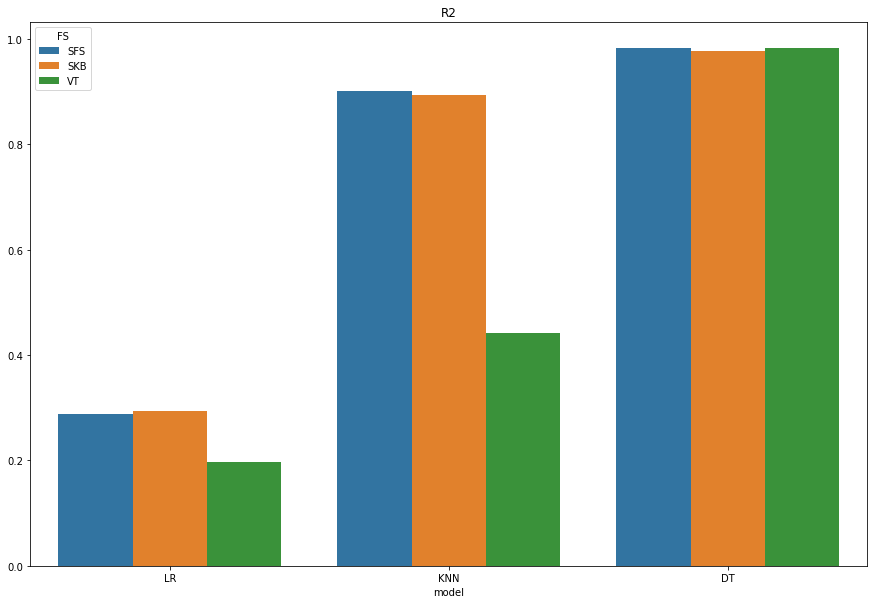

In [81]:
plt.figure(figsize=(15,10))
sns.barplot(data=vis_df, x='model', y='mean_test_r2', hue='FS')
plt.title('R2')
plt.ylabel('');

## MAE

In [82]:
vis_df[['model','FS','mean_test_neg_mean_absolute_error']]

,model,FS,mean_test_neg_mean_absolute_error
0,LR,SFS,1.537011
1,LR,SKB,1.583421
2,LR,VT,1.653305
0,KNN,SFS,0.364038
1,KNN,SKB,0.395421
2,KNN,VT,1.001281
0,DT,SFS,0.082666
1,DT,SKB,0.168692
2,DT,VT,0.077673


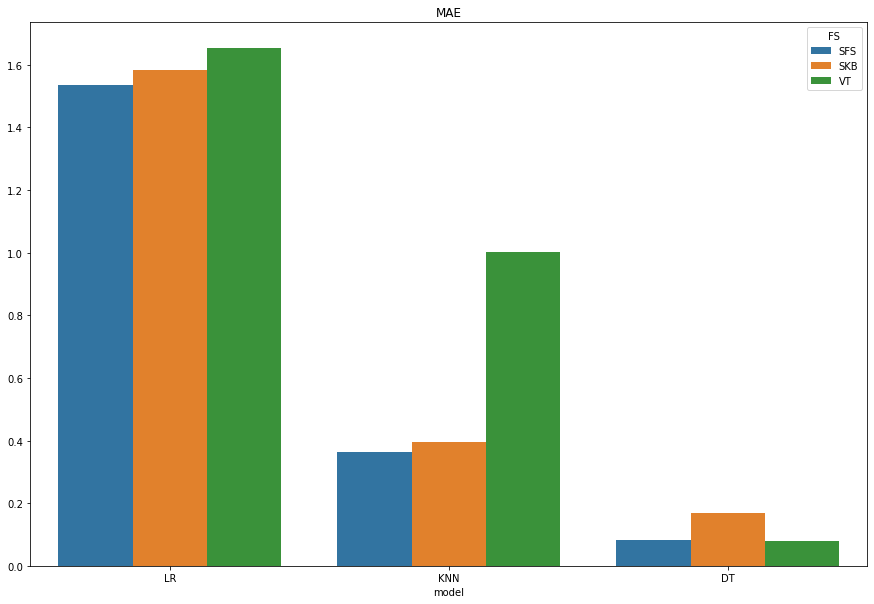

In [83]:
plt.figure(figsize=(15,10))
sns.barplot(data=vis_df, x='model', y='mean_test_neg_mean_absolute_error', hue='FS')
plt.title('MAE')
plt.ylabel('');

## MSE

In [84]:
vis_df[['model','FS','mean_test_neg_mean_squared_error']]

,model,FS,mean_test_neg_mean_squared_error
0,LR,SFS,15.490128
1,LR,SKB,15.399740
2,LR,VT,17.481865
0,KNN,SFS,2.104982
1,KNN,SKB,2.303940
2,KNN,VT,12.127617
0,DT,SFS,0.349982
1,DT,SKB,0.473530
2,DT,VT,0.344861


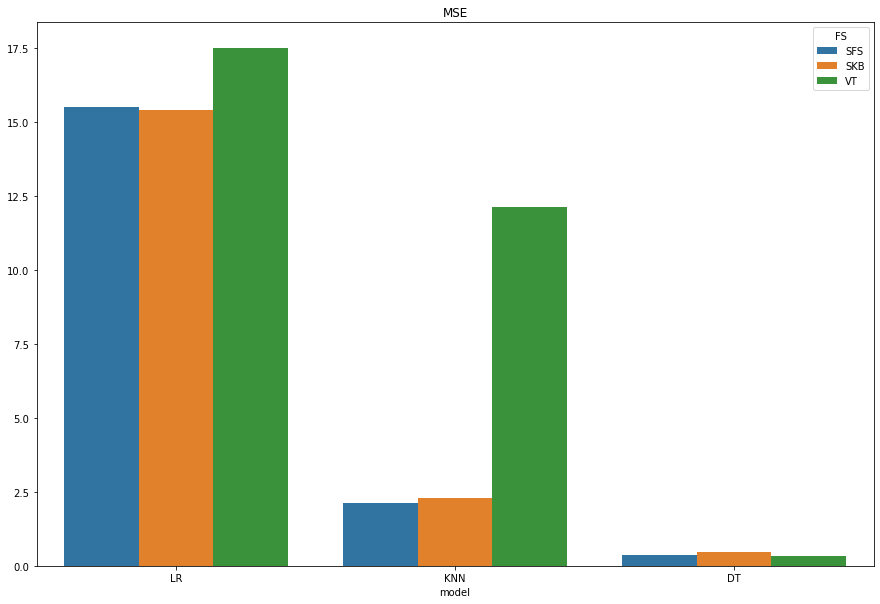

In [85]:
plt.figure(figsize=(15,10))
sns.barplot(data=vis_df, x='model', y='mean_test_neg_mean_squared_error', hue='FS')
plt.title('MSE')
plt.ylabel('');

## RMSE

In [86]:
vis_df[['model','FS','mean_test_neg_root_mean_squared_error']]

,model,FS,mean_test_neg_root_mean_squared_error
0,LR,SFS,3.933598
1,LR,SKB,3.922073
2,LR,VT,4.178551
0,KNN,SFS,1.396173
1,KNN,SKB,1.502660
2,KNN,VT,3.477429
0,DT,SFS,0.407309
1,DT,SKB,0.591571
2,DT,VT,0.398971


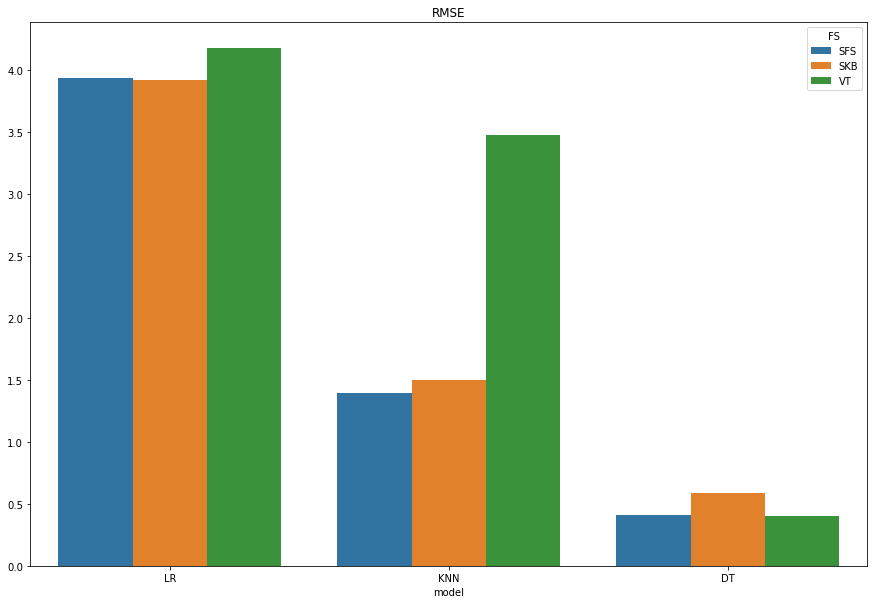

In [87]:
plt.figure(figsize=(15,10))
sns.barplot(data=vis_df, x='model', y='mean_test_neg_root_mean_squared_error', hue='FS')
plt.title('RMSE')
plt.ylabel('');

# LOW LABEL

In [88]:
X = df_low.drop(['LOW'], axis=1)
y = df_low.LOW

In [89]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

preprocessing = make_column_transformer(
    ('drop', ['SYMBOL1']),
    (OneHotEncoder(), ['MARKET']),
    remainder='passthrough')



# Linear regression

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
ml_LR = LinearRegression()

In [92]:
SFS = SequentialFeatureSelector(ml_LR, n_features_to_select='auto', scoring='r2')
params_SFS={
    'featureSelector':[SFS]
}


SKB = SelectKBest(f_regression, k=13)
params_SKB={
    'featureSelector':[SKB]
}

VT = VarianceThreshold(threshold=0.005)
params_VT = {
    'featureSelector':[VT],
}

params=[params_SFS,params_SKB,params_VT]

In [93]:
preprocessing.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop', ['SYMBOL1']),
                                ('onehotencoder', OneHotEncoder(), ['MARKET'])])

In [94]:
preprocessing.get_feature_names_out()[SFS.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_1', 'onehotencoder__MARKET_2',
       'remainder__SEC_CODE', 'remainder__VOLUME', 'remainder__TRADE_QTY',
       'remainder__BEST_BID_QTY', 'remainder__DAY'], dtype=object)

In [95]:
preprocessing.get_feature_names_out()[SKB.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__VOLUME', 'remainder__TRADE_QTY',
       'remainder__NO_OF_TRADES', 'remainder__BEST_ASK_PRICE',
       'remainder__BEST_ASK_QTY', 'remainder__BEST_BID_PRICE',
       'remainder__BEST_BID_QTY', 'remainder__MONTH', 'remainder__DAY'],
      dtype=object)

In [96]:
preprocessing.get_feature_names_out()[VT.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__MONTH', 'remainder__DAY'], dtype=object)

In [97]:
pipe_LR = Pipeline([('preprocessing',preprocessing), ('scaling', MinMaxScaler()), ('featureSelector',SFS),('regressor',ml_LR)])

In [98]:
pipe_LR.named_steps

{'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('drop', 'drop', ['SYMBOL1']),
                                 ('onehotencoder', OneHotEncoder(), ['MARKET'])]),
 'scaling': MinMaxScaler(),
 'featureSelector': SequentialFeatureSelector(estimator=LinearRegression(),
                           n_features_to_select='auto', scoring='r2'),
 'regressor': LinearRegression()}

In [99]:
grid_LR = GridSearchCV(pipe_LR, params, cv=10, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], refit=False, n_jobs=-1)

In [100]:
grid_LR.fit(X,y);

In [101]:
LR_df = pd.DataFrame(grid_LR.cv_results_)
LR_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_featureSelector,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,...,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,split5_test_neg_root_mean_squared_error,split6_test_neg_root_mean_squared_error,split7_test_neg_root_mean_squared_error,split8_test_neg_root_mean_squared_error,split9_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,4.515414,0.051327,0.006560,0.003008,SequentialFeatureSelector(estimator=LinearRegr...,{'featureSelector': SequentialFeatureSelector(...,0.287648,0.296744,0.270444,0.272748,...,-3.926647,-3.893556,-3.859240,-3.945803,-3.902960,-3.957593,-4.055049,-3.869476,0.128320,2
1,0.105846,0.006056,0.013167,0.001201,"SelectKBest(k=13, score_func=<function f_regre...","{'featureSelector': SelectKBest(k=13, score_fu...",0.293064,0.301373,0.274126,0.278149,...,-3.912040,-3.884804,-3.843713,-3.929088,-3.896073,-3.956944,-4.040956,-3.858185,0.128937,1
2,0.077531,0.013616,0.011270,0.003155,VarianceThreshold(threshold=0.005),{'featureSelector': VarianceThreshold(threshol...,0.202348,0.198857,0.201069,0.199505,...,-4.119635,-4.115442,-4.104032,-4.150262,-4.167670,-4.227080,-4.313726,-4.099136,0.144167,3


In [102]:
LR_df.param_featureSelector.unique()

array([SequentialFeatureSelector(estimator=LinearRegression(),
                                 n_features_to_select='auto', scoring='r2'),
       SelectKBest(k=13, score_func=<function f_regression at 0x0000021638C3CA60>),
       VarianceThreshold(threshold=0.005)], dtype=object)

In [103]:
LR_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']]

,param_featureSelector,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error
0,SequentialFeatureSelector(estimator=LinearRegr...,0.285513,-1.510751,-14.989307,-3.869476
1,"SelectKBest(k=13, score_func=<function f_regre...",0.289697,-1.556736,-14.902215,-3.858185
2,VarianceThreshold(threshold=0.005),0.198344,-1.622545,-16.823703,-4.099136


# K-neighbors regression

In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
ml_KNN = KNeighborsRegressor(2)

In [106]:
n_neighbors_range = range(2)

SFS = SequentialFeatureSelector(ml_KNN, n_features_to_select='auto', scoring='r2')
params_SFS={
    'featureSelector':[SFS]
}


SKB = SelectKBest(f_regression, k=11)
params_SKB={
    'featureSelector':[SKB]
}

VT = VarianceThreshold(threshold=0.005)
params_VT = {
    'featureSelector':[VT],
}

params=[params_SFS,params_SKB,params_VT]

In [107]:
preprocessing.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop', ['SYMBOL1']),
                                ('onehotencoder', OneHotEncoder(), ['MARKET'])])

In [108]:
preprocessing.get_feature_names_out()[SFS.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__BEST_BID_QTY', 'remainder__YEAR', 'remainder__MONTH'],
      dtype=object)

In [109]:
preprocessing.get_feature_names_out()[SKB.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__VOLUME', 'remainder__TRADE_QTY',
       'remainder__NO_OF_TRADES', 'remainder__BEST_ASK_PRICE',
       'remainder__BEST_ASK_QTY', 'remainder__BEST_BID_PRICE',
       'remainder__BEST_BID_QTY'], dtype=object)

In [110]:
preprocessing.get_feature_names_out()[VT.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__MONTH', 'remainder__DAY'], dtype=object)

In [111]:
pipe_KNN = Pipeline([('preprocessing', preprocessing),('scaling', MinMaxScaler()), ('featureSelector',SFS),('regressor',ml_KNN)])

In [112]:
pipe_KNN.named_steps

{'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('drop', 'drop', ['SYMBOL1']),
                                 ('onehotencoder', OneHotEncoder(), ['MARKET'])]),
 'scaling': MinMaxScaler(),
 'featureSelector': SequentialFeatureSelector(estimator=KNeighborsRegressor(n_neighbors=2),
                           n_features_to_select='auto', scoring='r2'),
 'regressor': KNeighborsRegressor(n_neighbors=2)}

In [113]:
grid_KNN = GridSearchCV(pipe_KNN, params, cv=10, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], refit=False, n_jobs=-1)

In [114]:
import time
start = time.time()
grid_KNN.fit(X,y);
time.time() - start

40.122973918914795

In [115]:
137-62, 218-137, 304-218

(75, 81, 86)

n_jobs = False: 38.08821988105774
n_jobs =-1 : 19.901278972625732
n_jobs =-1 high performance : 8.048777103424072

In [116]:
KNN_df = pd.DataFrame(grid_KNN.cv_results_)

In [117]:
KNN_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']].sort_values(by='mean_test_r2', ascending=False)

,param_featureSelector,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error
0,SequentialFeatureSelector(estimator=KNeighbors...,0.906367,-0.343928,-1.924223,-1.341079
1,"SelectKBest(k=11, score_func=<function f_regre...",0.894031,-0.388986,-2.213149,-1.473831
2,VarianceThreshold(threshold=0.005),0.444449,-0.981975,-11.637083,-3.406200


# Decision Tree Regressor

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
ml_DT = DecisionTreeRegressor(random_state=0)

In [120]:
SFS = SequentialFeatureSelector(ml_DT, n_features_to_select='auto', scoring='r2')
params_SFS={
    'featureSelector':[SFS]
}


SKB = SelectKBest(f_regression, k=13)
params_SKB={
    'featureSelector':[SKB]
}

VT = VarianceThreshold(threshold=0.005)
params_VT = {
    'featureSelector':[VT],
}

params=[params_SFS,params_SKB,params_VT]

In [121]:
preprocessing.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop', ['SYMBOL1']),
                                ('onehotencoder', OneHotEncoder(), ['MARKET'])])

In [122]:
preprocessing.get_feature_names_out()[SFS.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_2',
       'remainder__SEC_CODE', 'remainder__NO_OF_TRADES',
       'remainder__YEAR', 'remainder__MONTH', 'remainder__DAY'],
      dtype=object)

In [123]:
preprocessing.get_feature_names_out()[SKB.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__VOLUME', 'remainder__TRADE_QTY',
       'remainder__NO_OF_TRADES', 'remainder__BEST_ASK_PRICE',
       'remainder__BEST_ASK_QTY', 'remainder__BEST_BID_PRICE',
       'remainder__BEST_BID_QTY', 'remainder__MONTH', 'remainder__DAY'],
      dtype=object)

In [124]:
preprocessing.get_feature_names_out()[VT.fit(MinMaxScaler().fit_transform(preprocessing.fit_transform(X)), y).get_support()]

array(['onehotencoder__MARKET_0', 'onehotencoder__MARKET_1',
       'onehotencoder__MARKET_2', 'remainder__SEC_CODE',
       'remainder__MONTH', 'remainder__DAY'], dtype=object)

In [125]:
pipe_DT = Pipeline([('preprocessing',preprocessing),('scaling', MinMaxScaler()),('featureSelector',SFS),('regressor',ml_DT)])

In [126]:
pipe_DT.named_steps

{'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('drop', 'drop', ['SYMBOL1']),
                                 ('onehotencoder', OneHotEncoder(), ['MARKET'])]),
 'scaling': MinMaxScaler(),
 'featureSelector': SequentialFeatureSelector(estimator=DecisionTreeRegressor(random_state=0),
                           n_features_to_select='auto', scoring='r2'),
 'regressor': DecisionTreeRegressor(random_state=0)}

In [127]:
grid_DT = GridSearchCV(pipe_DT, params, cv=10, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], refit=False, n_jobs=-1)

In [128]:
grid_DT.fit(X,y);

In [129]:
DT_df = pd.DataFrame(grid_DT.cv_results_)

In [130]:
DT_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']]

,param_featureSelector,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error
0,SequentialFeatureSelector(estimator=DecisionTr...,0.981389,-0.091812,-0.348135,-0.429547
1,"SelectKBest(k=13, score_func=<function f_regre...",0.975348,-0.161761,-0.473648,-0.590782
2,VarianceThreshold(threshold=0.005),0.981885,-0.077796,-0.339944,-0.408561


# Visualisation

In [131]:
LR_vis = LR_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']]
LR_vis.loc[:, 'model'] = 'LR'
LR_vis.loc[:, 'FS'] = ['SFS', 'SKB', 'VT']

KNN_vis = KNN_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']]
KNN_vis.loc[:, 'model'] = 'KNN'
KNN_vis.loc[:, 'FS'] = ['SFS', 'SKB', 'VT']

DT_vis = DT_df[['param_featureSelector', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']]
DT_vis.loc[:, 'model'] = 'DT'
DT_vis.loc[:, 'FS'] = ['SFS', 'SKB', 'VT']

vis_df = pd.concat([LR_vis, KNN_vis, DT_vis])

C:\Users\Housam\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [132]:
vis_df

,param_featureSelector,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error,model,FS
0,SequentialFeatureSelector(estimator=LinearRegr...,0.285513,-1.510751,-14.989307,-3.869476,LR,SFS
1,"SelectKBest(k=13, score_func=<function f_regre...",0.289697,-1.556736,-14.902215,-3.858185,LR,SKB
2,VarianceThreshold(threshold=0.005),0.198344,-1.622545,-16.823703,-4.099136,LR,VT
0,SequentialFeatureSelector(estimator=KNeighbors...,0.906367,-0.343928,-1.924223,-1.341079,KNN,SFS
1,"SelectKBest(k=11, score_func=<function f_regre...",0.894031,-0.388986,-2.213149,-1.473831,KNN,SKB
2,VarianceThreshold(threshold=0.005),0.444449,-0.981975,-11.637083,-3.406200,KNN,VT
0,SequentialFeatureSelector(estimator=DecisionTr...,0.981389,-0.091812,-0.348135,-0.429547,DT,SFS
1,"SelectKBest(k=13, score_func=<function f_regre...",0.975348,-0.161761,-0.473648,-0.590782,DT,SKB
2,VarianceThreshold(threshold=0.005),0.981885,-0.077796,-0.339944,-0.408561,DT,VT


In [133]:
vis_df[['mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']] = vis_df[['mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error','mean_test_neg_root_mean_squared_error']].abs()

In [134]:
vis_df

,param_featureSelector,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error,model,FS
0,SequentialFeatureSelector(estimator=LinearRegr...,0.285513,1.510751,14.989307,3.869476,LR,SFS
1,"SelectKBest(k=13, score_func=<function f_regre...",0.289697,1.556736,14.902215,3.858185,LR,SKB
2,VarianceThreshold(threshold=0.005),0.198344,1.622545,16.823703,4.099136,LR,VT
0,SequentialFeatureSelector(estimator=KNeighbors...,0.906367,0.343928,1.924223,1.341079,KNN,SFS
1,"SelectKBest(k=11, score_func=<function f_regre...",0.894031,0.388986,2.213149,1.473831,KNN,SKB
2,VarianceThreshold(threshold=0.005),0.444449,0.981975,11.637083,3.406200,KNN,VT
0,SequentialFeatureSelector(estimator=DecisionTr...,0.981389,0.091812,0.348135,0.429547,DT,SFS
1,"SelectKBest(k=13, score_func=<function f_regre...",0.975348,0.161761,0.473648,0.590782,DT,SKB
2,VarianceThreshold(threshold=0.005),0.981885,0.077796,0.339944,0.408561,DT,VT


### Linear Regression
 SequentialFeatureSelector(ml_LR, n_features_to_select='auto', scoring='r2')<br>
SelectKBest(f_regression, k=13)<br>
VarianceThreshold(threshold=0.005)

### KNN
SequentialFeatureSelector(ml_KNN, n_features_to_select='auto', scoring='r2')<br>
SelectKBest(f_regression, k=11)<br>
VarianceThreshold(threshold=0.005)

### Decision Tree
SequentialFeatureSelector(ml_DT, n_features_to_select='auto', scoring='r2')<br>
SelectKBest(f_regression, k=13)<br>
VarianceThreshold(threshold=0.005)

## R2

In [135]:
vis_df[['model','FS','mean_test_r2']]

,model,FS,mean_test_r2
0,LR,SFS,0.285513
1,LR,SKB,0.289697
2,LR,VT,0.198344
0,KNN,SFS,0.906367
1,KNN,SKB,0.894031
2,KNN,VT,0.444449
0,DT,SFS,0.981389
1,DT,SKB,0.975348
2,DT,VT,0.981885


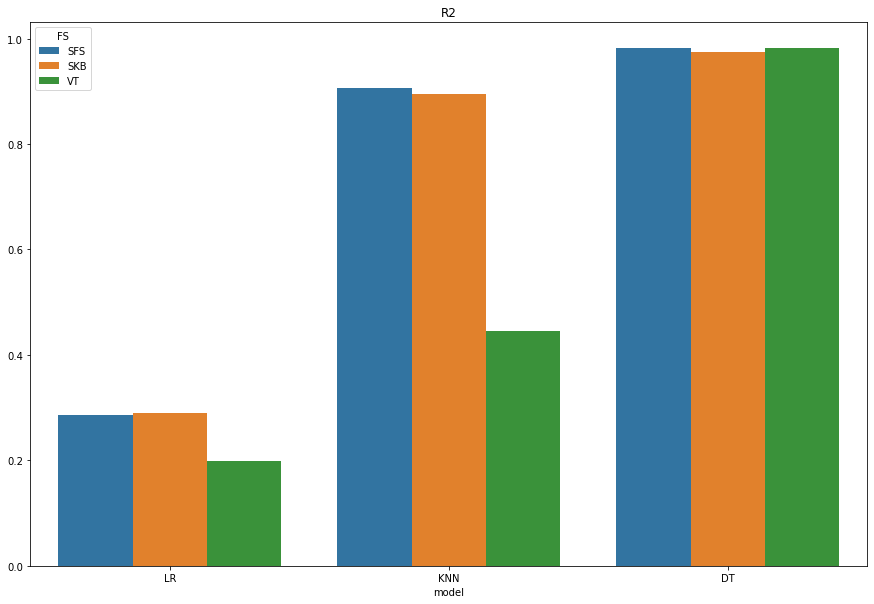

In [136]:
plt.figure(figsize=(15,10))
sns.barplot(data=vis_df, x='model', y='mean_test_r2', hue='FS')
plt.title('R2')
plt.ylabel('');

## MAE

In [137]:
vis_df[['model','FS','mean_test_neg_mean_absolute_error']]

,model,FS,mean_test_neg_mean_absolute_error
0,LR,SFS,1.510751
1,LR,SKB,1.556736
2,LR,VT,1.622545
0,KNN,SFS,0.343928
1,KNN,SKB,0.388986
2,KNN,VT,0.981975
0,DT,SFS,0.091812
1,DT,SKB,0.161761
2,DT,VT,0.077796


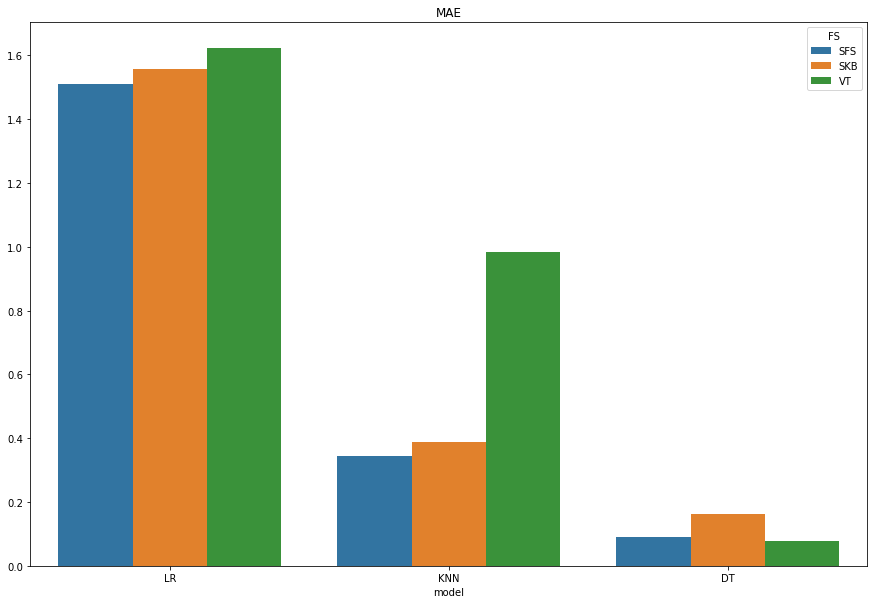

In [138]:
plt.figure(figsize=(15,10))
sns.barplot(data=vis_df, x='model', y='mean_test_neg_mean_absolute_error', hue='FS')
plt.title('MAE')
plt.ylabel('');

## MSE

In [139]:
vis_df[['model','FS','mean_test_neg_mean_squared_error']]

,model,FS,mean_test_neg_mean_squared_error
0,LR,SFS,14.989307
1,LR,SKB,14.902215
2,LR,VT,16.823703
0,KNN,SFS,1.924223
1,KNN,SKB,2.213149
2,KNN,VT,11.637083
0,DT,SFS,0.348135
1,DT,SKB,0.473648
2,DT,VT,0.339944


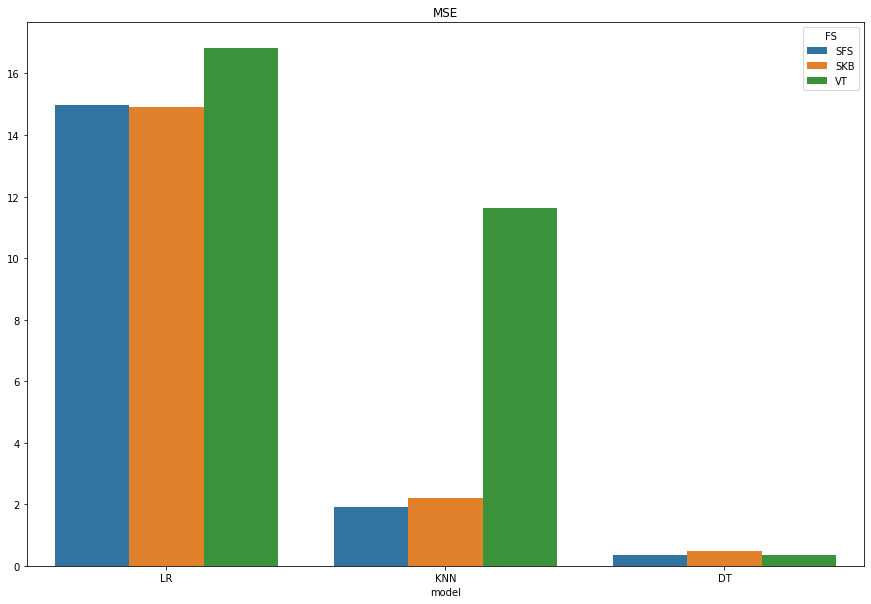

In [140]:
plt.figure(figsize=(15,10))
sns.barplot(data=vis_df, x='model', y='mean_test_neg_mean_squared_error', hue='FS')
plt.title('MSE')
plt.ylabel('');

## RMSE

In [141]:
vis_df[['model','FS','mean_test_neg_root_mean_squared_error']]

,model,FS,mean_test_neg_root_mean_squared_error
0,LR,SFS,3.869476
1,LR,SKB,3.858185
2,LR,VT,4.099136
0,KNN,SFS,1.341079
1,KNN,SKB,1.473831
2,KNN,VT,3.406200
0,DT,SFS,0.429547
1,DT,SKB,0.590782
2,DT,VT,0.408561


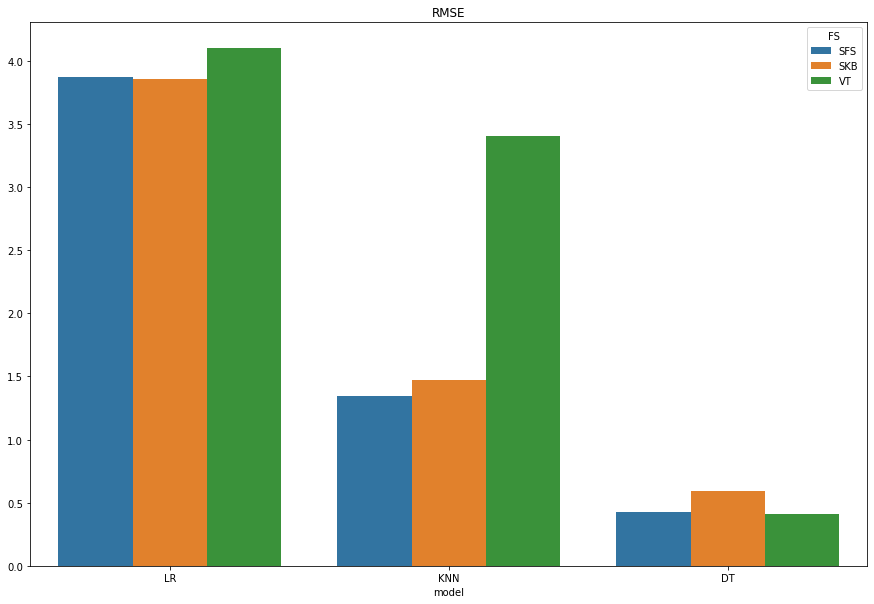

In [142]:
plt.figure(figsize=(15,10))
sns.barplot(data=vis_df, x='model', y='mean_test_neg_root_mean_squared_error', hue='FS')
plt.title('RMSE')
plt.ylabel('');